# Data Load and Cleaning

In [5]:
"""
Importing necessary Libraries
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
"""
Loading the csv data
csv taken from:   https://www.kaggle.com/bvc5283/bikeshare
"""

df_dirty = pd.read_csv(r"C:\Users\marce\Documents\Graduate School\Data 602\Linear Regression HW\Bike\Bikeshare.csv")
df = df_dirty.dropna()

print(df.shape)
df.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
"""
Checking Dataypes to ensure proper transformations/cleaning can take place
"""

df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Prelimary plotting, looking for relationships

In [8]:
"""
Reducing dataframe to features of interest.
df.describe() to get a more detailed understanding of data per feature
"""

df = df[['temp', 'atemp' ,'hum','windspeed','casual','registered','cnt']]

df.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
"""
Graphing all features against one another to locate any obvious relationships
"""

sns.pairplot(df)
plt.show()

<AxesSubplot:>

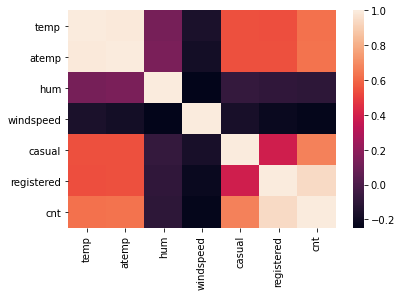

In [11]:
sns.heatmap(df.corr())

# Creature training and test splits

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size = 0.2)

print("Training Data Shape:" ,X_train.shape,"Testing Data Shape:", X_test.shape)

Training Data Shape: (584, 7) Testing Data Shape: (146, 7)


sns.lmplot(x='temp', y='casual', data=df, ci=0)
plt.draw()

In [13]:
##numpy to solve directly

X = np.array(X_train.temp)

ones = np.ones(shape=X.shape)

X = np.c_[ones, X]
X_Trans = X.T

np.linalg.inv( X_Trans.dot(X)).dot(X_Trans).dot(X_train.cnt)

array([1104.06114135,  168.81799091])

In [14]:
#Scikitlearn method for solving, super easy

from sklearn.linear_model import LinearRegression

LineR = LinearRegression()


In [15]:
from sklearn.tree import DecisionTreeRegressor as dtr

X_tree = X_train[['temp','registered']]
Y_tree = X_train[['casual']]

print(X_tree.head())
print(Y_tree.head())

          temp  registered
497  25.112500        3946
504  25.454153        4425
669  14.999153        5520
339  18.962500        2468
454  17.390847        3934
     casual
497    2172
504    2704
669     466
339     126
454    2301


# Gradient Descent

In [16]:
"""from sklearn.linear_model import SGDRegressor

sdg_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sdg_reg.fit(X_train, Ytrain.ravel())"""

'from sklearn.linear_model import SGDRegressor\n\nsdg_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)\nsdg_reg.fit(X_train, Ytrain.ravel())'

# Regression 1 temp, atemp

In [17]:
LineR.fit(X_train[["temp","atemp"]] , X_train.cnt)

print(LineR.intercept_, LineR.coef_)

r_square = LineR.score(X_train[['temp', 'atemp']], X_train.cnt)

873.7403309559327 [ 30.18038269 128.50061196]


In [18]:
import statsmodels.api as sm

X = X_train[['temp','atemp']]
y = X_train.casual
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     129.0
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           4.27e-47
Time:                        09:16:09   Log-Likelihood:                -4542.7
No. Observations:                 584   AIC:                             9091.
Df Residuals:                     581   BIC:                             9104.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -218.7352     78.926     -2.771      0.0

In [19]:
Xtest = X_test[['temp', 'atemp']]
ytest = X_test.casual
Xtest = sm.add_constant(Xtest)

y_predict = res.predict(Xtest)
y_predict

719     478.371004
421     391.608632
193    1374.160815
225    1224.288197
654     794.678584
          ...     
239    1282.832430
526    1310.877888
89      367.473200
360     513.218719
311     701.746103
Length: 146, dtype: float64

In [20]:
X_test

,temp,atemp,hum,windspeed,casual,registered,cnt
719,13.393347,15.08835,55.6667,25.083661,221,3402,3623
421,11.445847,13.41540,41.0000,13.750343,515,2874,3389
193,30.613347,34.47020,63.1667,9.790911,748,3594,4342
225,27.743347,31.21940,81.7500,14.916411,1338,2482,3820
654,18.689153,22.50540,69.2917,6.791857,979,6482,7461
...,...,...,...,...,...,...,...
239,28.989419,32.39795,56.1765,20.412153,1415,2919,4334
526,29.554153,32.98605,58.7917,13.916771,1017,5647,6664
89,11.001653,12.87875,91.8333,14.582282,179,1506,1685
360,13.325000,16.38165,76.2500,12.626150,103,1059,1162


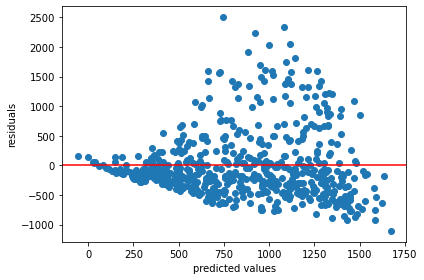

In [21]:
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', label='0')

plt.xlabel('predicted values')
plt.ylabel('residuals')

plt.tight_layout()

# Regression2 Registered

In [22]:
LineR.fit(X_train[["registered"]] , X_train.cnt)

print(LineR.intercept_, LineR.coef_)

r_square = LineR.score(X_train[['registered']], X_train.cnt)

204.93440198116514 [1.17917888]


In [23]:
import statsmodels.api as sm

X = X_train[['registered']]
y = X_train.cnt
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     5039.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          8.89e-289
Time:                        09:16:09   Log-Likelihood:                -4596.8
No. Observations:                 584   AIC:                             9198.
Df Residuals:                     582   BIC:                             9206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        204.9344     66.489      3.082      0.0

In [24]:
Xtest = X_test[['registered']]
ytest = X_test.cnt
Xtest = sm.add_constant(Xtest)

y_predict = res.predict(Xtest)
print(y_predict)

719    4216.500951
421    3593.894503
193    4442.903296
225    3131.656382
654    7848.371901
          ...     
239    3646.957552
526    6863.757536
89     1980.777795
360    1453.684836
311    4720.010333
Length: 146, dtype: float64


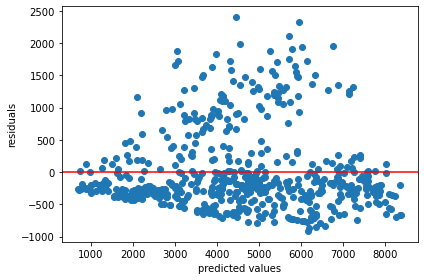

In [25]:
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', label='0')

plt.xlabel('predicted values')
plt.ylabel('residuals')

plt.tight_layout()

# Regression 3 Casual

In [26]:
LineR.fit(X_train[["casual"]] , X_train.cnt)

print(LineR.intercept_, LineR.coef_)

r_square = LineR.score(X_train[['casual']], X_train.cnt)

2873.382423500726 [1.92975864]


In [27]:
import statsmodels.api as sm

X = X_train[['casual']]
y = X_train.cnt
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     501.2
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           1.52e-80
Time:                        09:16:10   Log-Likelihood:                -5077.6
No. Observations:                 584   AIC:                         1.016e+04
Df Residuals:                     582   BIC:                         1.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2873.3824     95.539     30.076      0.0

In [28]:
Xtest = X_test[['casual']]
ytest = X_test.cnt
Xtest = sm.add_constant(Xtest)

y_predict = res.predict(Xtest)
print(y_predict)

719    3299.859084
421    3867.208125
193    4316.841889
225    5455.399489
654    4762.616136
          ...     
239    5603.990904
526    4835.946964
89     3218.809221
360    3072.147564
311    3598.971674
Length: 146, dtype: float64


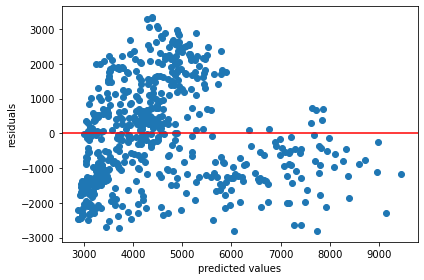

In [29]:
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', label='0')

plt.xlabel('predicted values')
plt.ylabel('residuals')

plt.tight_layout()

# Regression 4, polynomial

In [30]:
import statsmodels.api as sm

X = X_train[['temp', 'casual', 'registered']]
y = X_train.cnt
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.205e+32
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:16:10   Log-Likelihood:                 14774.
No. Observations:                 584   AIC:                        -2.954e+04
Df Residuals:                     580   BIC:                        -2.952e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.979e-12   3.17e-13    -12.545      0.0

In [60]:
Xtest = X_test[['temp','casual', 'registered']]
ytest = X_test.cnt
Xtest = sm.add_constant(Xtest)


y_predict = res.predict(Xtest)

print(y_predict)

719    3623.0
421    3389.0
193    4342.0
225    3820.0
654    7461.0
        ...  
239    4334.0
526    6664.0
89     1685.0
360    1162.0
311    4205.0
Length: 146, dtype: float64


C:\Users\marce\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [61]:
X_test

,temp,atemp,hum,windspeed,casual,registered,cnt,Predicted
719,13.393347,15.08835,55.6667,25.083661,221,3402,3623,3623.0
421,11.445847,13.41540,41.0000,13.750343,515,2874,3389,3389.0
193,30.613347,34.47020,63.1667,9.790911,748,3594,4342,4342.0
225,27.743347,31.21940,81.7500,14.916411,1338,2482,3820,3820.0
654,18.689153,22.50540,69.2917,6.791857,979,6482,7461,7461.0
...,...,...,...,...,...,...,...,...
239,28.989419,32.39795,56.1765,20.412153,1415,2919,4334,4334.0
526,29.554153,32.98605,58.7917,13.916771,1017,5647,6664,6664.0
89,11.001653,12.87875,91.8333,14.582282,179,1506,1685,1685.0
360,13.325000,16.38165,76.2500,12.626150,103,1059,1162,1162.0


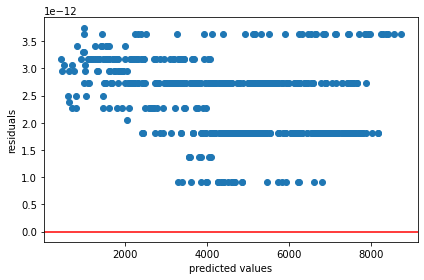

In [33]:
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', label='0')

plt.xlabel('predicted values')
plt.ylabel('residuals')

plt.tight_layout()

# Function list

In [58]:
def LR_fit(train, test, feat):
        
    LineR.fit(train[feat] , train.cnt)
    print("Intercept::", LineR.intercept_, "Coefficient", LineR.coef_)
    r_square = LineR.score(train[feat], train.cnt)
    print("R-squared value: ", r_square)
    
    X = train[feat]
    y = train.cnt
    X = sm.add_constant(X)
    mod = sm.OLS(y, X, hasconst= True)
    res = mod.fit()
    print(res.summary())
    
    Xtest = test[feat]
    ytest = test.cnt
    Xtest = sm.add_constant(Xtest)
    y_predict = res.predict(Xtest)
    print("Predicted y values", y_predict)    
    residuals = res.resid

    y_pred = res.predict(X)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='red', label='0')
    plt.xlabel('predicted values')
    plt.ylabel('residuals')
    plt.tight_layout()

Intercept:: 1159.1131612118866 Coefficient [ 3.46781064 91.93540545  1.30464962]
R-squared value:  0.572386056412274
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     258.8
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          1.47e-106
Time:                        09:43:19   Log-Likelihood:                -5010.9
No. Observations:                 584   AIC:                         1.003e+04
Df Residuals:                     580   BIC:                         1.005e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

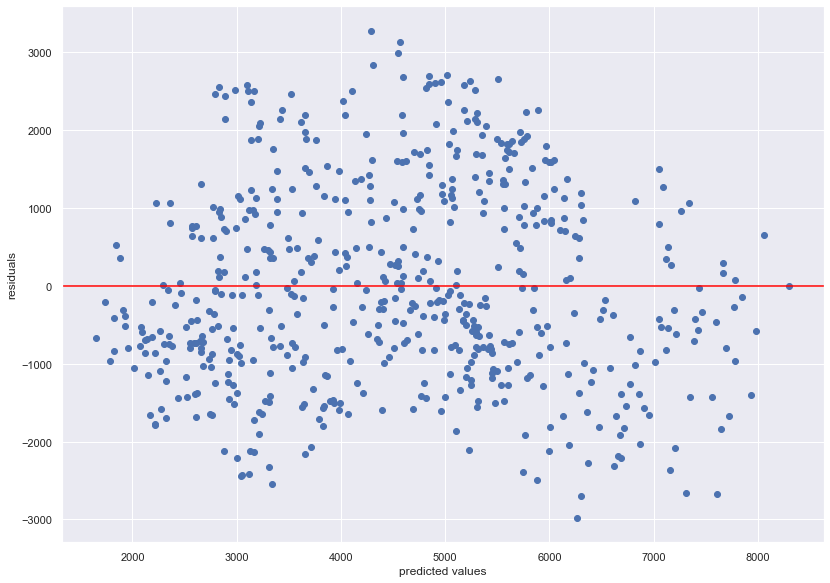

In [59]:
LR_fit(X_train, X_test,['temp', 'atemp', 'casual'])